In [249]:
import pandas as pd

In [250]:
patients = pd.read_csv('project1.csv')

In [251]:
patients.shape
# The data has 386 rows with 10 columns each, this means that the data holds information for 386 patients
# Using ls -lh project1.csv gives a file size of 26K

(386, 10)

In [252]:
patients.tail()

,class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
381,no-recurrence-events,40-49,premeno,30-34,3-5,no,3,right,left_low,no
382,no-recurrence-events,60-69,ge40,30-34,3-5,yes,2,right,left_up,yes
383,no-recurrence-events,70-79,premeno,20-24,0-2,no,3,right,right_up,no
384,no-recurrence-events,70-79,premeno,30-34,9-11,no,1,right,left_low,yes
385,no-recurrence-events,60-69,premeno,30-34,9-11,no,2,right,left_low,no


In [253]:
patients.info()
# All of the columns except for column 6 and 9 should be converted to categorical data
# I will convert column 9 into 0s and 1s, where 'no' is a 0 and 'yes' is a 1

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386 entries, 0 to 385
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   class        386 non-null    object
 1   age          386 non-null    object
 2   menopause    386 non-null    object
 3   tumor-size   385 non-null    object
 4   inv-nodes    385 non-null    object
 5   node-caps    386 non-null    object
 6   deg-malig    386 non-null    int64 
 7   breast       386 non-null    object
 8   breast-quad  386 non-null    object
 9   irradiat     386 non-null    object
dtypes: int64(1), object(9)
memory usage: 30.3+ KB


In [254]:
# Convert datatypes here
patients['class'] = patients['class'].astype("category")
patients['age'] = patients['age'].astype("category")
patients['menopause'] = patients['menopause'].astype("category")
patients['tumor-size'] = patients['tumor-size'].astype("category")
patients['inv-nodes'] = patients['inv-nodes'].astype("category")
patients['node-caps'] = patients['node-caps'].astype("category")
patients['breast'] = patients['breast'].astype("category")
patients['breast-quad'] = patients['breast-quad'].astype("category")
patients['irradiat'] = patients['irradiat'].map({'no': 0, 'yes': 1})




In [255]:
patients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386 entries, 0 to 385
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   class        386 non-null    category
 1   age          386 non-null    category
 2   menopause    386 non-null    category
 3   tumor-size   385 non-null    category
 4   inv-nodes    385 non-null    category
 5   node-caps    386 non-null    category
 6   deg-malig    386 non-null    int64   
 7   breast       386 non-null    category
 8   breast-quad  386 non-null    category
 9   irradiat     386 non-null    int64   
dtypes: category(8), int64(2)
memory usage: 11.0 KB


In [256]:
patients.duplicated().sum()
# There are 11 duplicate rows and they should be removed
patients.drop_duplicates(inplace=True, ignore_index=True)

In [257]:
patients.shape

(375, 10)

In [258]:
patients.isnull().sum()
# there are 2 missing values, one for tumor-size and one for inv-nodes

class          0
age            0
menopause      0
tumor-size     1
inv-nodes      1
node-caps      0
deg-malig      0
breast         0
breast-quad    0
irradiat       0
dtype: int64

In [259]:
# Because these 2 missing columns are category function, I will fill them in with their mode of that value for their age group
patients['tumor-size'] = patients.groupby('age')['tumor-size'].transform(lambda x: x.fillna(x.mode()[0]))
patients['inv-nodes'] = patients.groupby('age')['inv-nodes'].transform(lambda x: x.fillna(x.mode()[0]))

/tmp/ipykernel_651/1871753941.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  patients['tumor-size'] = patients.groupby('age')['tumor-size'].transform(lambda x: x.fillna(x.mode()[0]))
/tmp/ipykernel_651/1871753941.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  patients['inv-nodes'] = patients.groupby('age')['inv-nodes'].transform(lambda x: x.fillna(x.mode()[0]))


In [260]:
patients.isnull().sum()


class          0
age            0
menopause      0
tumor-size     0
inv-nodes      0
node-caps      0
deg-malig      0
breast         0
breast-quad    0
irradiat       0
dtype: int64

In [261]:
patients.describe()


,deg-malig,irradiat
count,375.000000,375.000000
mean,2.074667,0.218667
std,0.752730,0.413894
min,1.000000,0.000000
25%,2.000000,0.000000
50%,2.000000,0.000000
75%,3.000000,0.000000
max,3.000000,1.000000


<Axes: xlabel='deg-malig', ylabel='Count'>

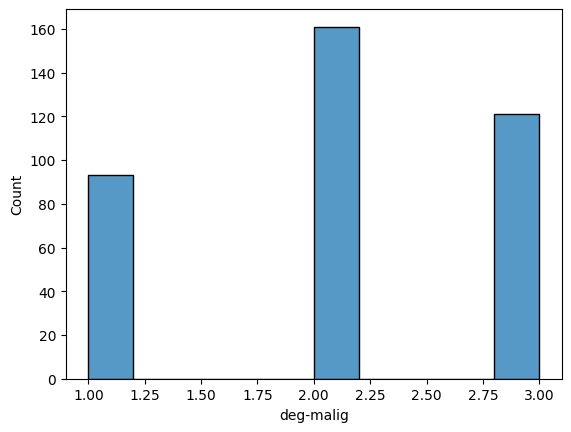

In [262]:
import seaborn as sns
sns.histplot(data=patients['deg-malig'])


<function matplotlib.pyplot.show(close=None, block=None)>

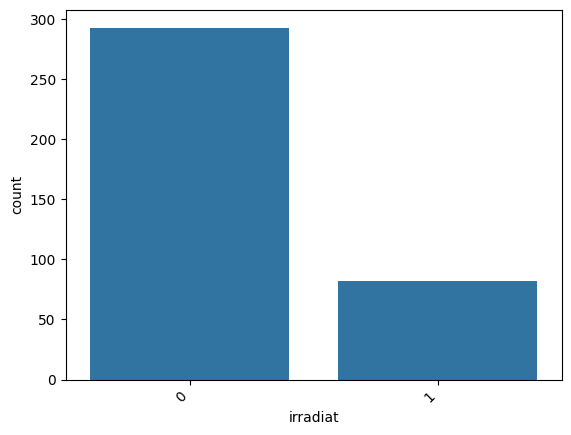

In [263]:
import matplotlib.pyplot as plt
sns.countplot(x=patients['irradiat'])
plt.xticks(rotation=45, ha='right')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

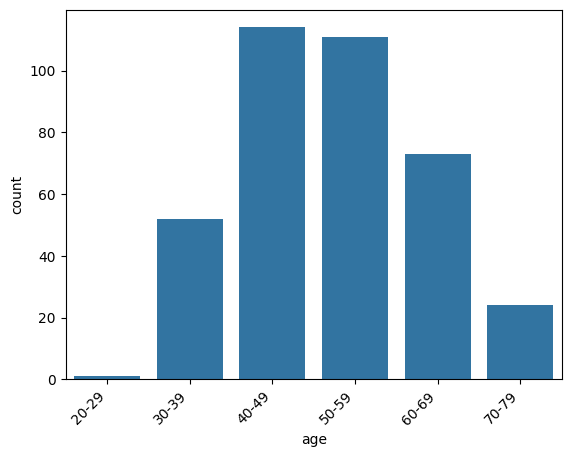

In [264]:
import matplotlib.pyplot as plt
sns.countplot(x=patients['age'])
plt.xticks(rotation=45, ha='right')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

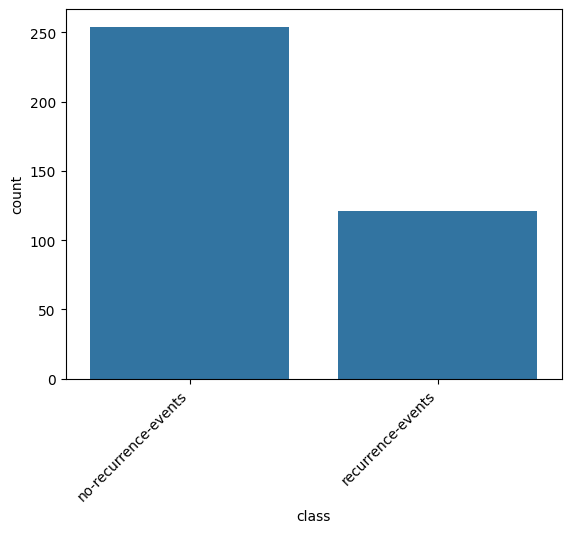

In [265]:
import matplotlib.pyplot as plt
sns.countplot(x=patients['class'])
plt.xticks(rotation=45, ha='right')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

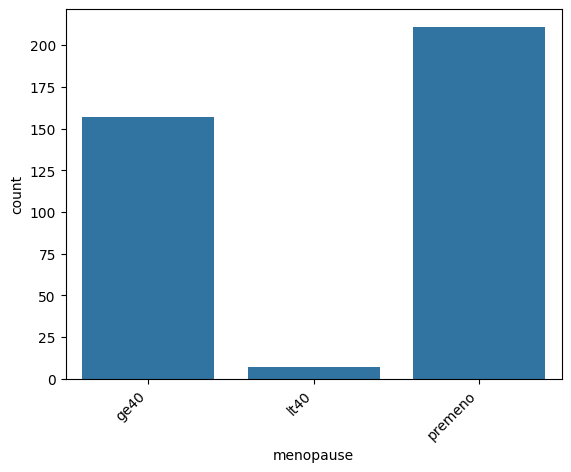

In [266]:
import matplotlib.pyplot as plt
sns.countplot(x=patients['menopause'])
plt.xticks(rotation=45, ha='right')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

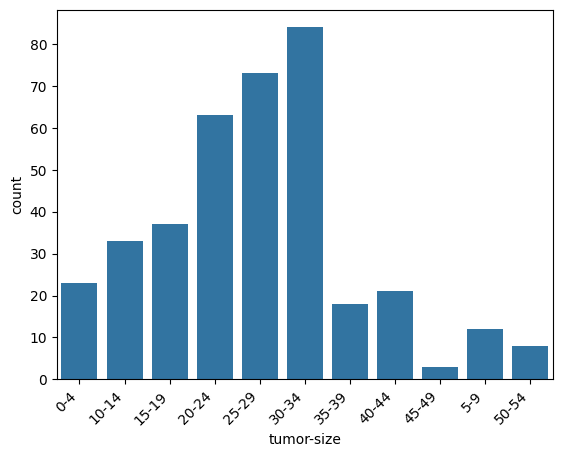

In [267]:
import matplotlib.pyplot as plt
sns.countplot(x=patients['tumor-size'])
plt.xticks(rotation=45, ha='right')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

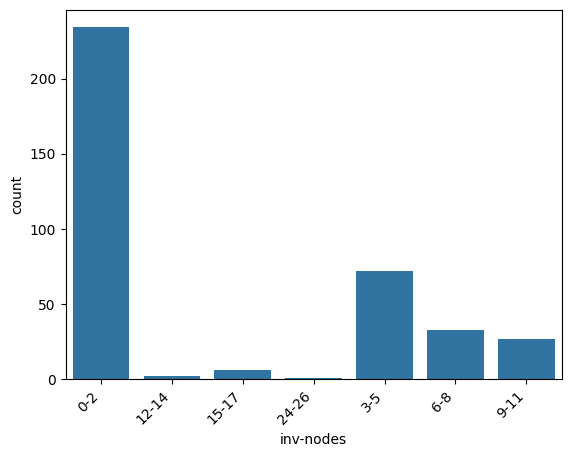

In [268]:
import matplotlib.pyplot as plt
sns.countplot(x=patients['inv-nodes'])
plt.xticks(rotation=45, ha='right')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

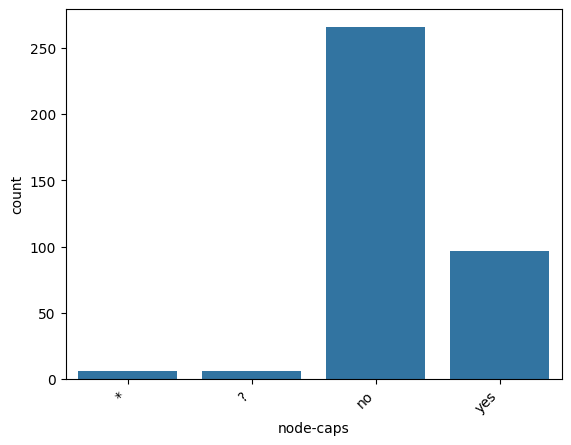

In [269]:
import matplotlib.pyplot as plt
sns.countplot(x=patients['node-caps'])
plt.xticks(rotation=45, ha='right')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

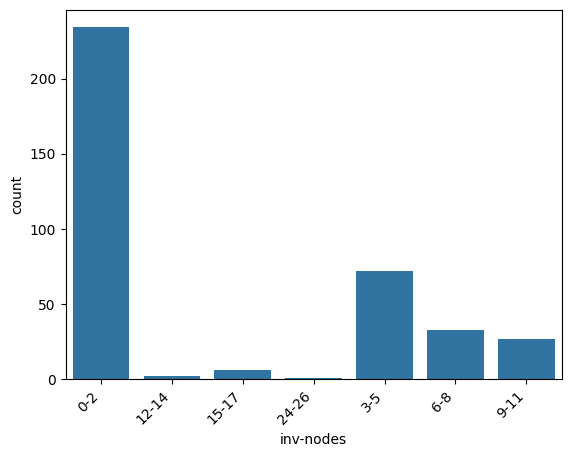

In [270]:
import matplotlib.pyplot as plt
sns.countplot(x=patients['inv-nodes'])
plt.xticks(rotation=45, ha='right')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

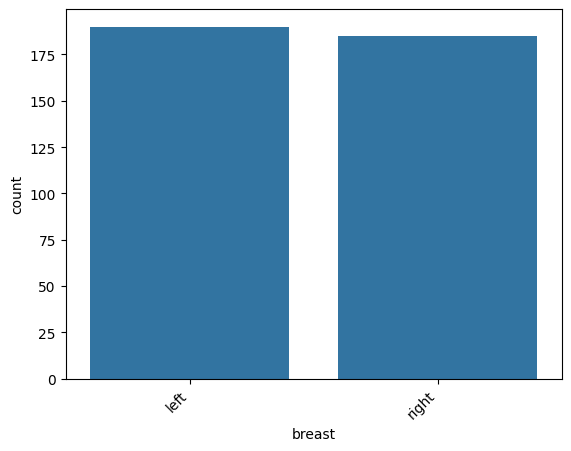

In [271]:
import matplotlib.pyplot as plt
sns.countplot(x=patients['breast'])
plt.xticks(rotation=45, ha='right')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

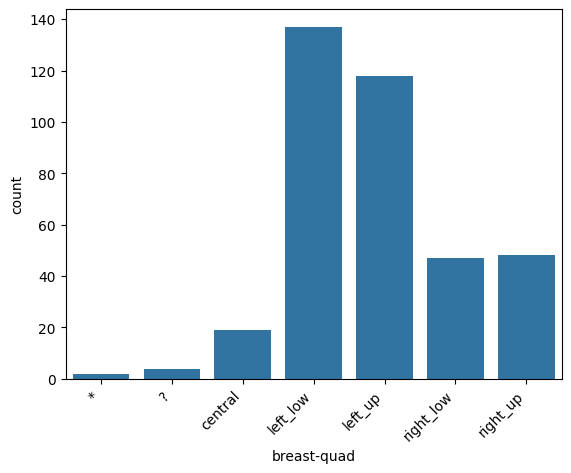

In [272]:
import matplotlib.pyplot as plt
sns.countplot(x=patients['breast-quad'])
plt.xticks(rotation=45, ha='right')
plt.show

In [140]:
# Based on the univariate analysis, we can see that the most common degree of malignance is 2, while it is more common for the cancer to not be irradiated

In [273]:
patients = pd.get_dummies(patients, columns=['class', 'age', 'menopause', 'tumor-size', 'inv-nodes', "node-caps", "breast", "breast-quad"], drop_first=True)
patients.info()
# The first category is dropped to avoid multicollinearity

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 36 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   deg-malig                375 non-null    int64
 1   irradiat                 375 non-null    int64
 2   class_recurrence-events  375 non-null    bool 
 3   age_30-39                375 non-null    bool 
 4   age_40-49                375 non-null    bool 
 5   age_50-59                375 non-null    bool 
 6   age_60-69                375 non-null    bool 
 7   age_70-79                375 non-null    bool 
 8   menopause_lt40           375 non-null    bool 
 9   menopause_premeno        375 non-null    bool 
 10  tumor-size_10-14         375 non-null    bool 
 11  tumor-size_15-19         375 non-null    bool 
 12  tumor-size_20-24         375 non-null    bool 
 13  tumor-size_25-29         375 non-null    bool 
 14  tumor-size_30-34         375 non-null    bool 
 15  tumor-

In [299]:
# part 2
from sklearn.model_selection import train_test_split

y = patients['class_recurrence-events']
X = patients.drop('class_recurrence-events', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=1)


In [332]:
from sklearn.neighbors import KNeighborsClassifier
# out of the neighbor parameters I tried, I found 14 neighbors to be the best for this dataset
knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train, y_train)

KNeighborsClassifier()

In [333]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

accuracy_test=accuracy_score(y_test, knn.predict(X_test))
print('Accuracy of knn on test data is : {:.2}'.format(accuracy_test))

accuracy_train=accuracy_score(y_train, knn.predict(X_train))
print('Accuracy of knn on train data is : {:.2}'.format(accuracy_train))

recall_test=recall_score(y_test, knn.predict(X_test))
print('Recall of knn on test data is : {:.2}'.format(recall_test))

recall_train=recall_score(y_train, knn.predict(X_train))
print('Recall of knn on train data is : {:.2}'.format(recall_train))

precision_test=precision_score(y_test, knn.predict(X_test))
print('Precision of knn on test data is : {:.2}'.format(precision_test))

precision_train=precision_score(y_train, knn.predict(X_train))
print('Precision of knn on train data is : {:.2}'.format(precision_train))

f1_test=f1_score(y_test, knn.predict(X_test))
print('f1 of knn on test data is : {:.2}'.format(f1_test))

f1_train=f1_score(y_train, knn.predict(X_train))
print('f1 of knn on train data is : {:.2}'.format(f1_train))

Accuracy of knn on test data is : 0.6
Accuracy of knn on train data is : 0.72
Recall of knn on test data is : 0.14
Recall of knn on train data is : 0.38
Precision of knn on test data is : 0.26
Precision of knn on train data is : 0.6
f1 of knn on test data is : 0.18
f1 of knn on train data is : 0.46


In [329]:
from sklearn.model_selection import GridSearchCV
import numpy as np


knn_search_accuracy = KNeighborsClassifier()
param_grid = {"n_neighbors": np.arange(1, 100)}

# maximize the gridsearch for recall, I believe this is the most important metric for this problem
knn_gscv = GridSearchCV(knn_search_accuracy, param_grid, cv=5, scoring="recall")
knn_gscv.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])},
             scoring='recall')

In [330]:
knn_gscv.best_params_


{'n_neighbors': 1}

In [331]:
best_knn = knn_gscv.best_estimator_
accuracy_test=accuracy_score(y_test, best_knn.predict(X_test))
print('Accuracy of knn on test data is : {:.2}'.format(accuracy_test))

accuracy_train=accuracy_score(y_train, best_knn.predict(X_train))
print('Accuracy of knn on train data is : {:.2}'.format(accuracy_train))

recall_test=recall_score(y_test, best_knn.predict(X_test))
print('Recall of knn on test data is : {:.2}'.format(recall_test))

recall_train=recall_score(y_train, best_knn.predict(X_train))
print('Recall of knn on train data is : {:.2}'.format(recall_train))

precision_test=precision_score(y_test, best_knn.predict(X_test))
print('Precision of knn on test data is : {:.2}'.format(precision_test))

precision_train=precision_score(y_train, best_knn.predict(X_train))
print('Precision of knn on train data is : {:.2}'.format(precision_train))

f1_test=f1_score(y_test, best_knn.predict(X_test))
print('f1 of knn on test data is : {:.2}'.format(f1_test))

f1_train=f1_score(y_train, best_knn.predict(X_train))
print('f1 of knn on train data is : {:.2}'.format(f1_train))



Accuracy of knn on test data is : 0.57
Accuracy of knn on train data is : 0.98
Recall of knn on test data is : 0.33
Recall of knn on train data is : 0.99
Precision of knn on test data is : 0.32
Precision of knn on train data is : 0.97
f1 of knn on test data is : 0.33
f1 of knn on train data is : 0.98


In [305]:
from sklearn.linear_model import SGDClassifier
clf = SGDClassifier(loss="perceptron", alpha=0.01)
clf.fit(X_train, y_train)


SGDClassifier(alpha=0.01, loss='perceptron')

In [306]:
accuracy_test=accuracy_score(y_test, clf.predict(X_test))
print('Accuracy of knn on test data is : {:.2}'.format(accuracy_test))

accuracy_train=accuracy_score(y_train, clf.predict(X_train))
print('Accuracy of knn on train data is : {:.2}'.format(accuracy_train))

recall_test=recall_score(y_test, clf.predict(X_test))
print('Recall of knn on test data is : {:.2}'.format(recall_test))

recall_train=recall_score(y_train, clf.predict(X_train))
print('Recall of knn on train data is : {:.2}'.format(recall_train))

precision_test=precision_score(y_test, clf.predict(X_test))
print('Precision of knn on test data is : {:.2}'.format(precision_test))

precision_train=precision_score(y_train, clf.predict(X_train))
print('Precision of knn on train data is : {:.2}'.format(precision_train))

f1_test=f1_score(y_test, clf.predict(X_test))
print('f1 of knn on test data is : {:.2}'.format(f1_test))

f1_train=f1_score(y_train, clf.predict(X_train))
print('f1 of knn on train data is : {:.2}'.format(f1_train))

Accuracy of knn on test data is : 0.68
Accuracy of knn on train data is : 0.72
Recall of knn on test data is : 0.083
Recall of knn on train data is : 0.25
Precision of knn on test data is : 0.5
Precision of knn on train data is : 0.7
f1 of knn on test data is : 0.14
f1 of knn on train data is : 0.37
